In [1]:
#from google.colab import drive
#from google.colab import files
import os
from lib.train_AI_lib import *

In [2]:
os.chdir('..')
print(os.getcwd())

c:\Users\kevin\Documents\GitHub\APS360-2020Summer-Project


In [3]:
import cv2
#### Filters we want to use ####
edgeDetect  = lambda oImg: cv2.Canny(oImg, 100, 100)
edgeDetect2 = lambda fImg: cv2.Canny(fImg, 175, 250)
laplacian   = lambda pImg: cv2.Laplacian(cv2.cvtColor(pImg, cv2.COLOR_BGR2GRAY),cv2.CV_64F)
gradient    = lambda gImg: cv2.morphologyEx(cv2.cvtColor(gImg, cv2.COLOR_BGR2GRAY), cv2.MORPH_GRADIENT, (5,5))
opening     = lambda cImg: cv2.morphologyEx(cv2.cvtColor(cImg, cv2.COLOR_BGR2GRAY), cv2.MORPH_OPEN, (5,5))
bilateral   = lambda bImg: cv2.bilateralFilter(cv2.cvtColor(bImg, cv2.COLOR_BGR2GRAY),9,100,100)
grayscale   = lambda rImg: cv2.cvtColor(rImg, cv2.COLOR_BGR2GRAY)

In [4]:
class CNN(nn.Module):
    def __init__(self, name):
        super(CNN, self).__init__()
        self.name = name

        self.conv1 = nn.Conv2d(1,   15,  6, stride=2)  # n = 1024 -> 510
        self.conv2 = nn.Conv2d(15,  30,  6, stride=2)  # n = 510  -> 253
        self.pool1 = nn.MaxPool2d(3, 2)                # n = 253  -> 126
        self.conv3 = nn.Conv2d(30,  60,  6, stride=2)  # n = 126  -> 61
        self.pool2 = nn.MaxPool2d(4, 2)                # n = 61   -> 29

        self.fc1   = nn.Linear(29*29*60, 20)
        self.fc2   = nn.Linear(20, 1)

    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = F.relu(self.conv2(x))
        x = self.pool2(F.relu(self.conv3(x)))
        x = x.view(-1, 29*29*60)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return(x)

In [5]:
class CNN_3Chan(nn.Module):
    def __init__(self, name):
        super(CNN_3Chan, self).__init__()
        self.name = name

        self.conv1 = nn.Conv2d(3,   15,  6, stride=2)  # n = 1024 -> 510
        self.conv2 = nn.Conv2d(15,  30,  6, stride=2)  # n = 510  -> 253
        self.pool1 = nn.MaxPool2d(3, 2)                # n = 253  -> 126
        self.conv3 = nn.Conv2d(30,  60,  6, stride=2)  # n = 126  -> 61
        self.pool2 = nn.MaxPool2d(4, 2)                # n = 61   -> 29

        self.fc1   = nn.Linear(29*29*60, 20)
        self.fc2   = nn.Linear(20, 1)

    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = F.relu(self.conv2(x))
        x = self.pool2(F.relu(self.conv3(x)))
        x = x.view(-1, 29*29*60)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return(x)

## Edge Detection

In [ ]:
# make dataloaders
trainLoader, valLoader, testLoader = loadData(batchsize = 32, args = {'func': edgeDetect})

In [ ]:
torch.cuda.is_available()

In [ ]:
my_model = CNN(name = "edgeDetect")
use_cuda = True

if use_cuda and torch.cuda.is_available():
  my_model.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

trainNet(net = my_model,
         data = [trainLoader, valLoader], 
         batchsize = 32, 
         epochNo = 20, 
         lr = 0.001)

Tested 99.96%

,
  5.14434814453125,
  21.541839599609375,
  -0.9249725341796875,
  6.3638763427734375,
  0.8022499084472656,
  21.000415802001953,
  12.939437866210938,
  -3.8098983764648438,
  19.382282257080078,
  29.28412628173828,
  7.439048767089844,
  15.860832214355469,
  6.843666076660156,
  22.085079193115234,
  -0.393768310546875,
  -7.534523010253906,
  4.839881896972656,
  0.8011322021484375,
  -11.611373901367188,
  3.7560195922851562,
  9.786308288574219,
  7.089439392089844,
  -15.209419250488281,
  5.124076843261719,
  -6.011135101318359,
  3.6425819396972656,
  -10.429916381835938,
  1.99053955078125,
  -12.125701904296875,
  7.392576217651367,
  30.167776107788086,
  12.644023895263672,
  -5.195743560791016,
  8.074195861816406,
  22.769535064697266,
  20.920631408691406,
  6.715976715087891,
  7.157341003417969,
  0.5490951538085938,
  -6.934253692626953,
  8.380481719970703,
  4.7968902587890625,
  -8.840240478515625,
  6.614540100097656,
  -0.9180374145507812,
  24.86083984375,


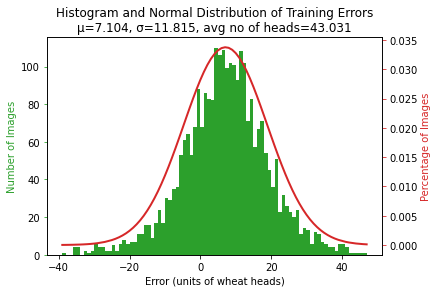

In [9]:
trainLoader, valLoader, testLoader = loadData(batchsize = 1, args = {'func': edgeDetect})
netPath = "/content/APS360-2020Summer-Project/saved/TrainingRuns/RegAdamTrainer/edgeDetect_b32_te20_lr0.001"
regresAnalysis(my_model, trainLoader, netPath)


## Edge Detection v2

In [ ]:
# make dataloaders
trainLoader, valLoader, testLoader = loadData(batchsize = 32, args = {'func': edgeDetect2})

In [ ]:
my_model = CNN(name = "edgeDetect2")
use_cuda = True

if use_cuda and torch.cuda.is_available():
  my_model.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

trainNet(net = my_model,
         data = [trainLoader, valLoader], 
         batchsize = 32, 
         epochNo = 20, 
         lr = 0.001)

Tested 99.96%

89062,
  -17.678504943847656,
  2.310558319091797,
  10.116081237792969,
  -11.109817504882812,
  2.3273086547851562,
  -0.15744781494140625,
  7.775554656982422,
  9.26451301574707,
  10.114456176757812,
  13.135787963867188,
  6.6285247802734375,
  10.726844787597656,
  -12.385902404785156,
  -14.597537994384766,
  8.27691650390625,
  8.892440795898438,
  -6.868207931518555,
  5.408357620239258,
  -1.902933120727539,
  -4.4937286376953125,
  0.23705291748046875,
  2.08502197265625,
  8.73244857788086,
  1.7306404113769531,
  9.148048400878906,
  9.950946807861328,
  6.2755279541015625,
  3.4181079864501953,
  1.7838783264160156,
  -0.4092750549316406,
  15.117820739746094,
  -11.955619812011719,
  4.254547119140625,
  -5.357412338256836,
  2.9181861877441406,
  4.389373779296875,
  -9.457218170166016,
  6.6209716796875,
  -5.3967132568359375,
  -1.24920654296875,
  8.088790893554688,
  15.178329467773438,
  3.8245391845703125,
  -9.290397644042969,
  -4.918468475341797,
  4.386379241

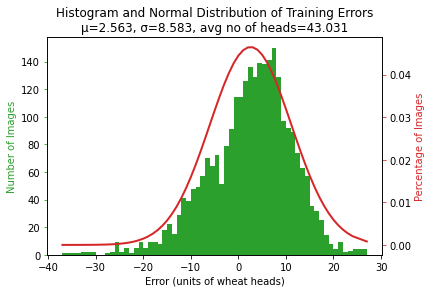

In [10]:
trainLoader, valLoader, testLoader = loadData(batchsize = 1, args = {'func': edgeDetect2})
netPath = "/content/APS360-2020Summer-Project/saved/TrainingRuns/RegAdamTrainer/edgeDetect2_b32_te20_lr0.001"
regresAnalysis(my_model, trainLoader, netPath)


## laplacian

In [ ]:
# make dataloaders
trainLoader, valLoader, testLoader = loadData(batchsize = 32, args = {'func': laplacian})

In [ ]:
my_model = CNN(name = "laplacian")
use_cuda = True

if use_cuda and torch.cuda.is_available():
  my_model.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

trainNet(net = my_model,
         data = [trainLoader, valLoader], 
         batchsize = 32, 
         epochNo = 20, 
         lr = 0.001)

Tested 99.96%

([4495.62158203125,
  13274.666015625,
  6405.5771484375,
  8957.5625,
  8616.435546875,
  6645.1396484375,
  3481.297119140625,
  7663.1748046875,
  13360.224609375,
  3525.383544921875,
  7965.35400390625,
  2977.947998046875,
  2967.977783203125,
  1727.817138671875,
  4196.2138671875,
  2153.40625,
  7904.0439453125,
  13097.7060546875,
  5133.88427734375,
  10878.8896484375,
  3682.842041015625,
  2039.980224609375,
  8423.4326171875,
  6736.99755859375,
  17280.267578125,
  6918.10498046875,
  2555.143798828125,
  3964.617919921875,
  12315.9970703125,
  4040.140625,
  12831.7099609375,
  5664.314453125,
  2741.80859375,
  15017.005859375,
  4126.8525390625,
  3462.3876953125,
  15043.0830078125,
  2858.218994140625,
  5294.58056640625,
  3516.713623046875,
  15936.8193359375,
  5992.1767578125,
  968.8067016601562,
  8723.7001953125,
  6768.5244140625,
  5197.78955078125,
  2471.026123046875,
  4330.65625,
  2896.973388671875,
  6027.15478515625,
  15757.0751953125,
  2774.45800

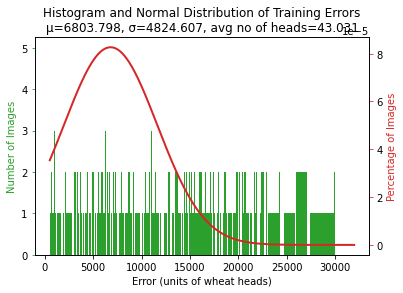

In [21]:
trainLoader, valLoader, testLoader = loadData(batchsize = 1, args = {'func': laplacian})
netPath = "/content/APS360-2020Summer-Project/saved/TrainingRuns/RegAdamTrainer/laplacian_b32_te20_lr0.001"
regresAnalysis(my_model, trainLoader, netPath)


## gradient

In [ ]:
# make dataloaders
trainLoader, valLoader, testLoader = loadData(batchsize = 32, args = {'func': gradient})

In [ ]:
my_model = CNN(name = "gradient")
use_cuda = True

if use_cuda and torch.cuda.is_available():
  my_model.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

trainNet(net = my_model,
         data = [trainLoader, valLoader], 
         batchsize = 32, 
         epochNo = 20, 
         lr = 0.001)

Tested 99.96%

.9289731979370117,
  -11.065454483032227,
  -21.989415168762207,
  -6.610649108886719,
  -40.08436679840088,
  9.94111442565918,
  -3.1563148498535156,
  20.676313400268555,
  -30.44652271270752,
  -23.0411434173584,
  -35.2877779006958,
  -20.961515426635742,
  17.659719467163086,
  -22.28367042541504,
  -37.33533763885498,
  -58.99443054199219,
  -47.601866245269775,
  -51.466291427612305,
  -11.287395477294922,
  -42.19741249084473,
  -39.8922004699707,
  -45.99752998352051,
  -5.646965980529785,
  -7.46843147277832,
  -44.95430946350098,
  5.225698471069336,
  -41.99499320983887,
  -41.24626350402832,
  -61.19364547729492,
  -39.8692569732666,
  -50.30674934387207,
  -17.172542572021484,
  12.109670639038086,
  -43.672112464904785,
  -30.951274871826172,
  -59.25644302368164,
  -40.14707660675049,
  -41.036869049072266,
  -37.024452209472656,
  -53.380149841308594,
  -52.64086723327637,
  -40.043954849243164,
  2.5265121459960938,
  -9.795921325683594,
  5.970987319946289,
  -10.63

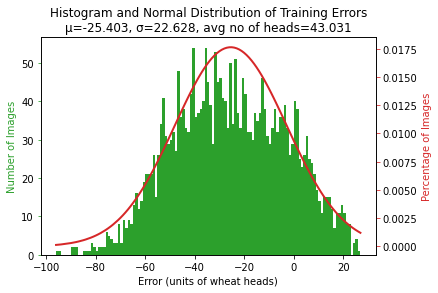

In [12]:
trainLoader, valLoader, testLoader = loadData(batchsize = 1, args = {'func': gradient})
netPath = "/content/APS360-2020Summer-Project/saved/TrainingRuns/RegAdamTrainer/gradient_b32_te20_lr0.001"
regresAnalysis(my_model, trainLoader, netPath)

## opening

In [ ]:
# make dataloaders
trainLoader, valLoader, testLoader = loadData(batchsize = 32, args = {'func': opening})

In [ ]:
my_model = CNN(name = "opening")
use_cuda = True

if use_cuda and torch.cuda.is_available():
  my_model.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

trainNet(net = my_model,
         data = [trainLoader, valLoader], 
         batchsize = 32, 
         epochNo = 20, 
         lr = 0.001)

Tested 99.96%

1,
  -68.8613657951355,
  -41.6102991104126,
  -75.33118152618408,
  -35.457998275756836,
  -11.43492078781128,
  -13.75137996673584,
  -13.665489912033081,
  -48.15765190124512,
  -61.14308834075928,
  -43.69681739807129,
  -38.97416639328003,
  -8.854273319244385,
  -24.04073190689087,
  -74.86143064498901,
  -7.459197044372559,
  -29.84364366531372,
  -12.624804019927979,
  -15.318560242652893,
  2.9135396480560303,
  -8.434946060180664,
  -26.554901123046875,
  -92.03063631057739,
  -51.07476329803467,
  -43.00255584716797,
  -39.17366600036621,
  -33.29637169837952,
  -10.933658599853516,
  -32.841135025024414,
  -35.43862974643707,
  -17.842270374298096,
  -31.22548747062683,
  -11.465831756591797,
  -45.34719753265381,
  -22.128070831298828,
  -69.13101959228516,
  -39.82810878753662,
  -40.706435680389404,
  -17.920798301696777,
  -21.728473663330078,
  -58.28337335586548,
  -64.9866886138916,
  -18.67514133453369,
  -41.52513885498047,
  -31.326354026794434,
  -15.366132259368

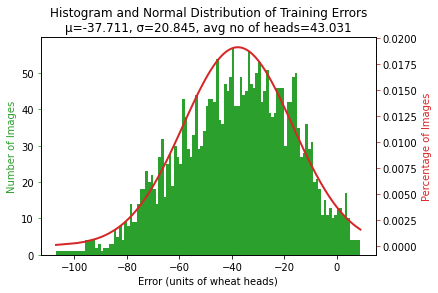

In [20]:
trainLoader, valLoader, testLoader = loadData(batchsize = 1, args = {'func': opening})
netPath = "/content/APS360-2020Summer-Project/saved/TrainingRuns/RegAdamTrainer/opening_b32_te20_lr0.001"
regresAnalysis(my_model, trainLoader, netPath)

## Bilateral

In [ ]:
# make dataloaders
trainLoader, valLoader, testLoader = loadData(batchsize = 32, args = {'func': bilateral})

In [ ]:
my_model = CNN(name = "bilateral")
use_cuda = True

if use_cuda and torch.cuda.is_available():
  my_model.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

trainNet(net = my_model,
         data = [trainLoader, valLoader], 
         batchsize = 32, 
         epochNo = 20, 
         lr = 0.001)

Tested 99.96%

64.65646266937256,
  -27.093016147613525,
  -20.5556378364563,
  -61.87424182891846,
  -48.732422828674316,
  -66.80886650085449,
  -41.81606912612915,
  -9.218639850616455,
  -15.593420028686523,
  -28.553210258483887,
  -79.1185712814331,
  -49.33694076538086,
  -41.61711549758911,
  -10.350582599639893,
  -42.93540334701538,
  -52.83334732055664,
  -40.804665088653564,
  -32.246177673339844,
  -45.37294960021973,
  0.5611906051635742,
  -35.220547676086426,
  -77.23838996887207,
  -74.7823257446289,
  -42.84662437438965,
  -18.69857168197632,
  -8.283091068267822,
  -29.131468296051025,
  -59.37291860580444,
  -24.863154411315918,
  3.0010604858398438,
  -67.9458794593811,
  -13.538930416107178,
  -2.563190460205078,
  -17.1682071685791,
  -36.285300731658936,
  -45.146270751953125,
  -30.766205310821533,
  -46.940147399902344,
  -37.547783851623535,
  -45.85328435897827,
  -7.637777328491211,
  -25.071259021759033,
  -17.172042846679688,
  -27.456738471984863,
  -23.779518604278564

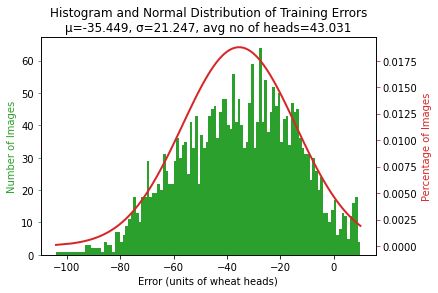

In [17]:
trainLoader, valLoader, testLoader = loadData(batchsize = 1, args = {'func': bilateral})
netPath = "/content/APS360-2020Summer-Project/saved/TrainingRuns/RegAdamTrainer/bilateral_b32_te20_lr0.001"
regresAnalysis(my_model, trainLoader, netPath)

# Using semi-supervised model

### encD + greyscale image

Epoch 0 | Time Taken: 65.33s | Training Error: 0.9817384953, Training loss: 21.6663996735 | Validation Error: 0.9795321637, Validation loss: 18.9394127778
Epoch 1 | Time Taken: 62.56s | Training Error: 0.9799123448, Training loss: 17.3395855341 | Validation Error: 0.9707602339, Validation loss: 15.5452365282
Epoch 2 | Time Taken: 62.10s | Training Error: 0.9718772827, Training loss: 15.5711627171 | Validation Error: 0.9824561404, Validation loss: 14.4701572036
Epoch 3 | Time Taken: 61.66s | Training Error: 0.9696859021, Training loss: 14.0569728728 | Validation Error: 0.9853801170, Validation loss: 14.1195307706
Epoch 4 | Time Taken: 61.93s | Training Error: 0.9715120526, Training loss: 13.8238433982 | Validation Error: 0.9619883041, Validation loss: 13.6978215137
Epoch 5 | Time Taken: 62.79s | Training Error: 0.9678597516, Training loss: 12.9575592318 | Validation Error: 0.9649122807, Validation loss: 13.6951686458
Epoch 6 | Time Taken: 60.51s | Training Error: 0.9685902118, Training 

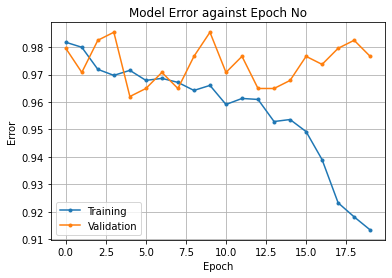

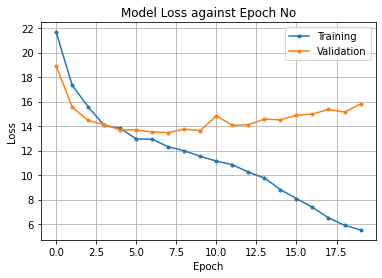

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [21.666399673518356,
  17.339585534099935,
  15.571162717117561,
  14.056972872772707,
  13.823843398165767,
  12.95755923179321,
  12.93008183092607,
  12.310230601232842,
  11.992198825781998,
  11.532361204052053,
  11.146673331900875,
  10.85288142792554,
  10.248716363789205,
  9.770269644023344,
  8.819424271612391,
  8.091748604221698,
  7.373526089462814,
  6.516000547197271,
  5.91328464483545,
  5.529920666611384],
 [18.93941277779307,
  15.54523652819718,
  14.470157203575313,
  14.119530770568092,
  13.697821513659816,
  13.695168645809789,
  13.516840952922058,
  13.4746836634973,
  13.754311583903638,
  13.643846726641604,
  14.837350313761354,
  14.060582280263453,
  14.114499228370969,
  14.573477975169373,
  14.515295995337235,
  14.893560639628067,
  14.99113706519184,
  15.36259547622305,
  15.146780540540528,
  15.807802555972637],
 [0.9817384952520087,
  0.9799123447772097,
  0.97187728268809

In [16]:
trainLoader, valLoader, testLoader = loadData(batchsize = 32, inPath='saved/autEncMasked/autEncD', args = {'func': grayscale, 'cuda':1})
my_model = CNN(name = "CNN_encD"); my_model.cuda()
trainNet(net = my_model, data = [trainLoader, valLoader], batchsize = 32, epochNo = 20, lr = 0.001)


In [39]:
netPath = "saved/TrainingRuns/RegAdamTrainer/CNN_encD_b32_te20_lr0.001"
my_model = CNN(name="CNN_encD"); my_model.cuda()
my_model.load_state_dict(torch.load(netPath+"/model_epoch19"))
trainLoader, valLoader, testLoader = loadData(batchsize = 1, args = {'func': grayscale}, inPath='saved/autEncMasked/autEncD')
regresAnalysis(my_model, trainLoader, netPath, mode='train')

TypeError: 'inPath' is an invalid keyword argument for this function

In [ ]:
netPath = "saved/TrainingRuns/RegAdamTrainer/CNN_encD_b32_te20_lr0.001"
my_model = CNN(name="CNN_encD"); my_model.cuda()
my_model.load_state_dict(torch.load(netPath+"/model_epoch19"))
trainLoader, valLoader, testLoader = loadData(batchsize = 1, args = {'func': grayscale})
regresAnalysis(my_model, valLoader, netPath, mode='val')

In [ ]:
netPath = "saved/TrainingRuns/RegAdamTrainer/CNN_encD_b32_te20_lr0.001"
my_model = CNN(name="CNN_encD"); my_model.cuda()
my_model.load_state_dict(torch.load(netPath+"/model_epoch19"))
trainLoader, valLoader, testLoader = loadData(batchsize = 1, args = {'func': grayscale})
regresAnalysis(my_model, testLoader, netPath, mode='test')

### encD, 3 channels

In [6]:
trainLoader, valLoader, testLoader = loadData(batchsize = 45, inPath='saved/autEncMasked/autEncD')
my_model = CNN_3Chan(name = "CNN_encD_3Chan"); my_model.cuda()
trainNet(net = my_model, data = [trainLoader, valLoader], batchsize = 45, epochNo = 30, lr = 0.001)

RuntimeError: CUDA out of memory. Tried to allocate 746.00 MiB (GPU 0; 6.00 GiB total capacity; 3.47 GiB already allocated; 301.66 MiB free; 3.93 GiB reserved in total by PyTorch)

Tested 99.96%

8047,
  -1.2332611083984375,
  0.5605545043945312,
  -3.466442108154297,
  -0.14057159423828125,
  -0.8863677978515625,
  -2.175201416015625,
  -14.109784126281738,
  1.2654266357421875,
  -1.6735153198242188,
  -3.013856887817383,
  0.4153789281845093,
  -1.7213592529296875,
  -1.9391679763793945,
  -0.5667343139648438,
  0.8890800476074219,
  0.5404815673828125,
  -0.267427921295166,
  -1.9054946899414062,
  -0.24198532104492188,
  1.0215187072753906,
  -1.3484992980957031,
  -0.28403282165527344,
  -2.717235565185547,
  -1.6924076080322266,
  0.3197002410888672,
  -1.3425216674804688,
  -1.7648162841796875,
  -0.8807220458984375,
  0.3398017883300781,
  13.106388092041016,
  0.4456138610839844,
  -0.5874214172363281,
  -0.1002349853515625,
  -0.662074089050293,
  -4.866115570068359,
  0.6142921447753906,
  0.1604156494140625,
  -0.13472366333007812,
  -0.8065719604492188,
  1.9513311386108398,
  -2.4881858825683594,
  -2.0040035247802734,
  -5.143592834472656,
  -5.236209869384766,


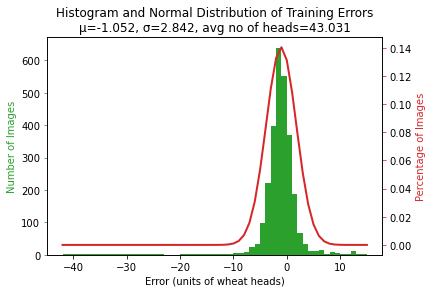

In [36]:
netPath = "saved/TrainingRuns/RegAdamTrainer/CNN_encD_3Chan_b32_te25_lr0.001"
my_model = CNN_3Chan(name="CNN_encD_3Chan"); my_model.cuda()
my_model.load_state_dict(torch.load(netPath+"/model_epoch22"))
trainLoader, valLoader, testLoader = loadData(batchsize = 1, inPath='saved/autEncMasked/autEncD')
regresAnalysis(my_model, trainLoader, netPath, mode='train')

Tested 99.71%

([11.946678161621094,
  -12.631141662597656,
  -8.560657501220703,
  9.863173484802246,
  -32.57345771789551,
  11.940986633300781,
  9.203683853149414,
  45.8023681640625,
  2.225597381591797,
  -31.020715713500977,
  22.332275390625,
  -33.69105815887451,
  -10.433906555175781,
  0.5968055725097656,
  2.2081375122070312,
  16.915069580078125,
  6.693584442138672,
  -32.58845901489258,
  -30.7381591796875,
  -8.420307159423828,
  18.679584503173828,
  9.321578979492188,
  8.70352554321289,
  8.344989776611328,
  5.199947357177734,
  -12.429428100585938,
  15.588361740112305,
  9.6361083984375,
  4.827842712402344,
  6.11846923828125,
  7.156116485595703,
  4.688828468322754,
  1.7441577911376953,
  0.4196949005126953,
  -9.603851318359375,
  -13.102485656738281,
  -19.638673782348633,
  -10.521820068359375,
  10.36328125,
  -2.9829559326171875,
  6.566150665283203,
  -1.0095901489257812,
  12.175743103027344,
  1.7543716430664062,
  10.755413055419922,
  10.180923461914062,
  33.99428

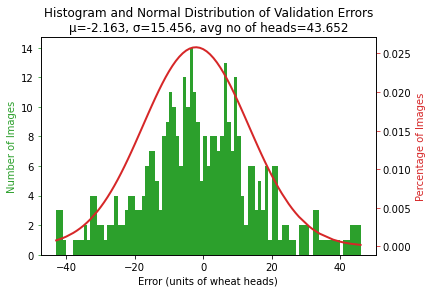

In [37]:
netPath = "saved/TrainingRuns/RegAdamTrainer/CNN_encD_3Chan_b32_te25_lr0.001"
my_model = CNN_3Chan(name="CNN_encD_3Chan"); my_model.cuda()
my_model.load_state_dict(torch.load(netPath+"/model_epoch22"))
trainLoader, valLoader, testLoader = loadData(batchsize = 1, inPath='saved/autEncMasked/autEncD')
regresAnalysis(my_model, valLoader, netPath, mode='val')

Tested 99.71%

([31.21308135986328,
  -8.233455657958984,
  -19.24795150756836,
  -16.920387268066406,
  9.744674682617188,
  -18.350482940673828,
  -2.0170516967773438,
  -1.5708236694335938,
  -45.09326171875,
  6.204748153686523,
  -16.728443145751953,
  -14.153743743896484,
  -8.057220458984375,
  -16.41250991821289,
  21.327362060546875,
  -11.111370086669922,
  -12.309886932373047,
  15.888229370117188,
  3.4507675170898438,
  -11.627510070800781,
  -24.37995147705078,
  -10.779541015625,
  5.040702819824219,
  8.273155212402344,
  3.440826416015625,
  -10.249500274658203,
  -6.122989654541016,
  3.805413246154785,
  -1.0547981262207031,
  26.31140899658203,
  12.168296813964844,
  -7.177483081817627,
  -6.756366729736328,
  -1.2760028839111328,
  -18.06083106994629,
  -23.73384666442871,
  -31.241851806640625,
  -2.1799678802490234,
  3.3212814331054688,
  -0.2854766845703125,
  1.8145580291748047,
  -11.171976089477539,
  18.487361907958984,
  36.832069396972656,
  -24.81089973449707,
  -3.60

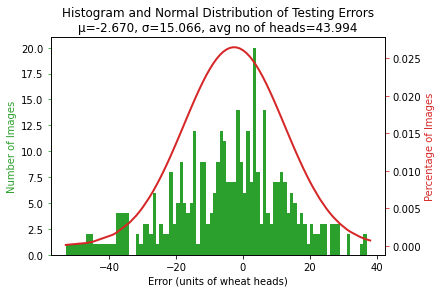

In [38]:
netPath = "saved/TrainingRuns/RegAdamTrainer/CNN_encD_3Chan_b32_te25_lr0.001"
my_model = CNN_3Chan(name="CNN_encD_3Chan"); my_model.cuda()
my_model.load_state_dict(torch.load(netPath+"/model_epoch22"))
trainLoader, valLoader, testLoader = loadData(batchsize = 1, inPath='saved/autEncMasked/autEncD')
regresAnalysis(my_model, testLoader, netPath, mode='test')

### encD + edgeDetect

Epoch 0 | Time Taken: 98.89s | Training Error: 0.9875821768, Training loss: 23.4872369248 | Validation Error: 0.9883040936, Validation loss: 20.2617454160
Epoch 1 | Time Taken: 97.71s | Training Error: 0.9813732652, Training loss: 20.0229806036 | Validation Error: 0.9912280702, Validation loss: 19.7006839706
Epoch 2 | Time Taken: 97.42s | Training Error: 0.9810080351, Training loss: 19.1803461422 | Validation Error: 0.9795321637, Validation loss: 18.2245696906
Epoch 3 | Time Taken: 96.43s | Training Error: 0.9817384953, Training loss: 18.4264314970 | Validation Error: 0.9649122807, Validation loss: 17.6902977495
Epoch 4 | Time Taken: 96.89s | Training Error: 0.9755295836, Training loss: 18.5048487727 | Validation Error: 0.9883040936, Validation loss: 17.6971441409
Epoch 5 | Time Taken: 96.98s | Training Error: 0.9810080351, Training loss: 17.4898566268 | Validation Error: 0.9883040936, Validation loss: 20.7413212320
Epoch 6 | Time Taken: 96.45s | Training Error: 0.9810080351, Training 

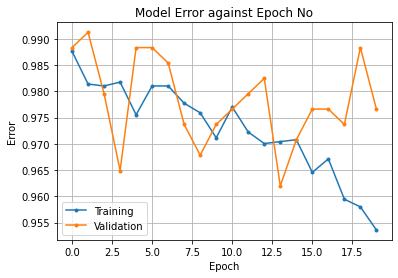

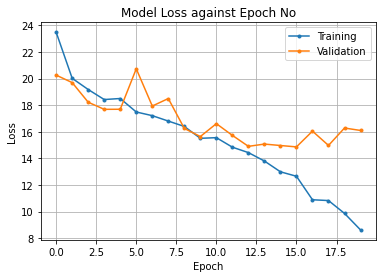

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [23.487236924818433,
  20.02298060364746,
  19.180346142238193,
  18.426431497008185,
  18.50484877270241,
  17.489856626761494,
  17.215092041135662,
  16.80795401547153,
  16.403065231966046,
  15.51074551411133,
  15.560747621735292,
  14.844482107983389,
  14.43638155641404,
  13.804242271394617,
  12.992937100609383,
  12.657433048914015,
  10.890121496688025,
  10.830875380390673,
  9.865722743080283,
  8.623087360749496],
 [20.261745416024745,
  19.700683970563702,
  18.224569690598813,
  17.690297749500935,
  17.697144140917395,
  20.74132123201778,
  17.93784300772525,
  18.501611625337368,
  16.255335816087758,
  15.644584184452496,
  16.61295172499059,
  15.731959812690786,
  14.907020602728688,
  15.078019753518696,
  14.969849403306316,
  14.865987076941614,
  16.05012705495236,
  14.975804460471606,
  16.285475372140382,
  16.10177468804544],
 [0.987582176771366,
  0.9813732651570489,
  0.9810080350

In [8]:
trainLoader, valLoader, testLoader = loadData(batchsize = 32, args = {'func': edgeDetect2})
my_model = CNN(name = "CNN_edgeDetect2_encD"); my_model.cuda()
trainNet(net = my_model, data = [trainLoader, valLoader], batchsize = 32, epochNo = 20, lr = 0.001)

Tested 99.96%


  11.627822875976562,
  -24.93970489501953,
  -2.648345947265625,
  -1.2142524719238281,
  6.278278350830078,
  1.9200057983398438,
  6.266510009765625,
  4.764503479003906,
  -3.020711898803711,
  6.642799377441406,
  -11.940147399902344,
  11.182926177978516,
  4.586490631103516,
  -2.6823158264160156,
  -4.41595458984375,
  -8.928680419921875,
  -3.0125885009765625,
  -4.63932991027832,
  7.982704162597656,
  21.01551055908203,
  -2.55560302734375,
  8.125625610351562,
  15.731939315795898,
  6.4245147705078125,
  -0.018194198608398438,
  9.97540283203125,
  12.650957107543945,
  8.499122619628906,
  9.240211486816406,
  2.6704940795898438,
  17.165157318115234,
  2.873605728149414,
  -1.3083038330078125,
  4.541419982910156,
  -26.982397079467773,
  18.84262466430664,
  9.212852478027344,
  1.7903709411621094,
  2.845733642578125,
  7.510162353515625,
  -0.8517913818359375,
  7.466978073120117,
  0.9717178344726562,
  -25.056015014648438,
  -0.02231414057314396,
  11.5723323822021

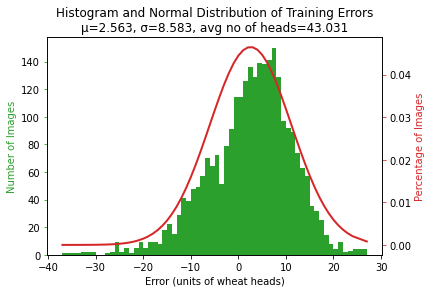

In [16]:
netPath = "/content/APS360-2020Summer-Project/saved/TrainingRuns/RegAdamTrainer/CNN_edgeDetect2_encD_b32_te20_lr0.001"
trainLoader, valLoader, testLoader = loadData(batchsize = 1, args = {'func': edgeDetect2})
regresAnalysis(my_model, trainLoader, netPath)

# Filter Testing

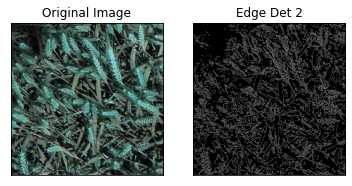

In [22]:
filepath = '/content/APS360-2020Summer-Project/data/working-wheat-data/train/0a3cb453f.jpg'

# Edge Detect 2
img   = cv2.imread(filepath)
edges = cv2.Canny(img,175,250)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Det 2'), plt.xticks([]), plt.yticks([])
plt.show()

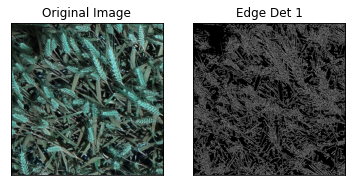

In [23]:
# Edge Detect 1
img   = cv2.imread(filepath)
edges = cv2.Canny(img,100,100)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Det 1'), plt.xticks([]), plt.yticks([])
plt.show()

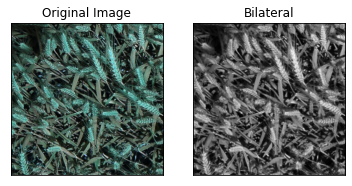

In [24]:
# Bilateral
img  = cv2.imread(filepath)
imgf = cv2.bilateralFilter(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY),9,100,100)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(imgf,cmap = 'gray')
plt.title('Bilateral'), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
# Edge Det and Bilateral
img  = cv2.imread(filepath)
imgf = cv2.bilateralFilter(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY),9,75,50)
imgf = cv2.Canny(imgf,125,250)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(imgf,cmap = 'gray')
plt.title('Bilateral + Edge Det'), plt.xticks([]), plt.yticks([])
plt.show()

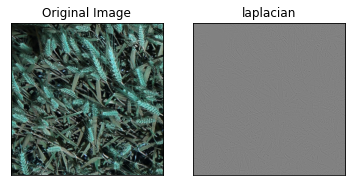

In [26]:
# laplacian
img  = cv2.imread(filepath)
imgf = cv2.Laplacian(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY),cv2.CV_64F)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(imgf,cmap = 'gray')
plt.title('laplacian'), plt.xticks([]), plt.yticks([])
plt.show()